<font color='green' size=6> Avaliando Desempenho em Machine Learning </font>
<hr>

# 1 - Importando Dados 

In [22]:
# Importando módulo pandas
import pandas as pd

# Importando o módulo numpy
import numpy as np

## 1.1 - Dados para Algoritmos de Classificação

In [21]:
# Carregando a base de dados
diabetes = pd.read_csv('/home/joeldspy/Modelos/datasets/diabetes.csv')

# Visualizando as 5 primeiras observações da base de dados
diabetes.head()

,prg,glu,bp,skn,ins,bmi,dpf,age,out
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 1.2 - Dados para Algoritmos de Regressão

In [16]:
# Importando a base de dados
cars = pd.read_csv('/home/joeldspy/Modelos/datasets/mtcars.csv')

# Visualizando os 5 primeiros elementos
cars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


# 2 - Avaliando Modelos de Classificação

## 2.1 - Acurácia

In [3]:
# Definindo a seed do bloco de código
np.random.seed(75)

# Importando função de regressão logística
from sklearn.linear_model import LogisticRegression

# Importando função para separação de dados entre treino e teste
from sklearn.model_selection import train_test_split

# Importando função para cálculo de acurácia
from sklearn.metrics import accuracy_score

# Separando dados entre dados de entrada e saída
x = diabetes.drop(['out'], axis=1)
y = diabetes['out']

# Separando dados entre treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35)

# Criando um modelo
model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Treinando o modelo
model.fit(x_train, y_train)

# Gerando dados preditos
y_pred = model.predict(x_test)

# Calculando a acurácia
acr = accuracy_score(y_test, y_pred)

# Visualizando a acurácia
print(f'Acurácia de: {acr:.2f}')

Acurácia de: 0.79


In [4]:
# Definindo a seed do bloco de código
np.random.seed(75)

# Importando função de regressão logística
from sklearn.linear_model import LogisticRegression

# Importando função para validação cruzada
from sklearn.model_selection import cross_validate

# Importando função para criação de validação cruzada aleatória
from sklearn.model_selection import KFold

# Importando função para cálculo de acurácia
from sklearn.metrics import accuracy_score

# Separando dados entre dados de entrada e saída
x = diabetes.drop(['out'], axis=1)
y = diabetes['out']

# Criando um modelo
model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Criando o método de validação cruzada
kfold = KFold(n_splits=10, shuffle=True)

# Aplicando a validação de cruzada
results = cross_validate(model, x, y, cv=kfold, scoring='accuracy')

# Extraindo os dados
acr = results['test_score']

# Visualizando os dados
print(f'Acurácia média de: {np.mean(acr):.2f} com desvio padrão de {np.std(acr):.4f}')

Acurácia média de: 0.77 com desvio padrão de 0.0370


## 2.2 - Curva ROC

In [6]:
# Definindo a seed do bloco de código
np.random.seed(75)

# Importando função de regressão logística
from sklearn.linear_model import LogisticRegression

# Importando função para validação cruzada
from sklearn.model_selection import cross_validate

# Importando função para criação de validação cruzada aleatória
from sklearn.model_selection import KFold

# Importando função para cálculo de acurácia
from sklearn.metrics import accuracy_score

# Separando dados entre dados de entrada e saída
x = diabetes.drop(['out'], axis=1)
y = diabetes['out']

# Criando um modelo
model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Criando o método de validação cruzada
kfold = KFold(n_splits=10, shuffle=True)

# Aplicando a validação de cruzada
results = cross_validate(model, x, y, cv=kfold, scoring='roc_auc')

# Extraindo os dados
acr = results['test_score']

# Visualizando os dados
print(f'Curva ROC média de: {np.mean(acr):.2f} com desvio padrão de {np.std(acr):.4f}')

Curva ROC média de: 0.83 com desvio padrão de 0.0318


## 2.3 - Matriz de Confusão

In [14]:
# Definindo a seed do bloco de código
np.random.seed(75)

# Importando função de regressão logística
from sklearn.linear_model import LogisticRegression

# Importando função para separação de dados entre treino e teste
from sklearn.model_selection import train_test_split

# Importando função para cálculo de acurácia
from sklearn.metrics import confusion_matrix

# Separando dados entre dados de entrada e saída
x = diabetes.drop(['out'], axis=1)
y = diabetes['out']

# Separando dados entre treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35)

# Criando um modelo
model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Treinando o modelo
model.fit(x_train, y_train)

# Gerando dados preditos
y_pred = model.predict(x_test)

# Calculando a matriz de confusão
acr = confusion_matrix(y_test, y_pred)

# Visualizando a acurácia
acr

array([[159,  13],
       [ 43,  54]])

<Axes: >

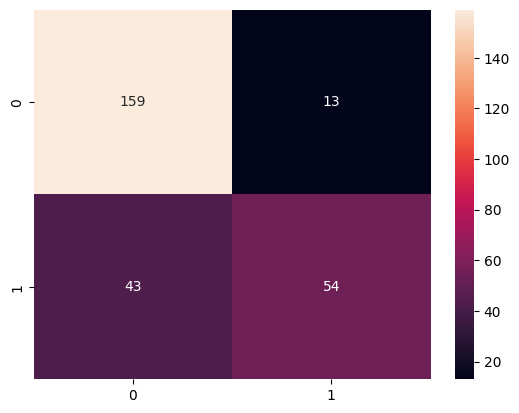

In [15]:
## Visualizando em forma de gráfico
import seaborn as sns
sns.heatmap(acr, annot=True, fmt='d')

# 3 - Avaliando Modelos de Regressão

## 3.1 Error Médio Absoluto (EMA)

<font size=5> $$ MAE = \frac{1}{n} \sum_{i=1}^{n} \left| y_{\text{true}, i} - y_{\text{pred}, i} \right| $$

In [43]:
# Definindo a semente de decisões aleatórias
np.random.seed(75)

# Importando modelo de regressão linear
from sklearn.linear_model import LinearRegression

# Importando função para validação cruzada
from sklearn.model_selection import cross_validate, cross_val_score

# Separando dados entre entrada e saída
x = cars.drop(columns=['mpg', 'name'])
y = cars['mpg']

# Criando o modelo
model = LinearRegression()

# Avaliando o modelo
results = cross_validate(model, x, y, cv = 10, scoring='neg_mean_absolute_error')

# Extraindo os dados de erro médio absoluto
MAE = results['test_score']

print(f'MAE: {MAE.mean():.2f}, sigma = {MAE.std():.2f}')

MAE: -3.59, sigma = 1.61


## 3.2 - Erro Médio Quadrado (EMQ)

<font size=5> $$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{true}, i} - y_{\text{pred}, i})^2 $$

In [49]:
# Definindo a semente de decisões aleatórias
np.random.seed(75)

# Importando modelo de regressão linear
from sklearn.linear_model import LinearRegression

# Importando função para validação cruzada
from sklearn.model_selection import cross_validate, cross_val_score

# Separando dados entre entrada e saída
x = cars.drop(columns=['mpg', 'name'])
y = cars['mpg']

# Criando o modelo
model = LinearRegression()

# Avaliando o modelo
results = cross_validate(model, x, y, cv = 10, scoring='neg_mean_squared_error')

# Extraindo os dados de erro médio absoluto
MSE = results['test_score']

print(f'MSE: {MSE.mean():.2f}, sigma = {MSE.std():.2f}')

MSE: -18.94, sigma = 15.52


## 3.3 - Raiz do Erro Médio Quadrado (REMQ)

<font size=5> $$ RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_{\text{true}, i} - y_{\text{pred}, i})^2} $$ 

In [50]:
# Definindo a semente de decisões aleatórias
np.random.seed(75)

# Importando modelo de regressão linear
from sklearn.linear_model import LinearRegression

# Importando função para validação cruzada
from sklearn.model_selection import cross_validate, cross_val_score

# Separando dados entre entrada e saída
x = cars.drop(columns=['mpg', 'name'])
y = cars['mpg']

# Criando o modelo
model = LinearRegression()

# Avaliando o modelo
results = cross_validate(model, x, y, cv = 10, scoring='neg_root_mean_squared_error')

# Extraindo os dados de erro médio absoluto
RMSE = results['test_score']

print(f'RMSE: {RMSE.mean():.2f}, sigma = {RMSE.std():.2f}')

RMSE: -4.02, sigma = 1.66


## 3.4 - R²

<font size=5> $$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_{\text{true}, i} - y_{\text{pred}, i})^2}{\sum_{i=1}^{n} (y_{\text{true}, i} - \bar{y}_{\text{true}})^2} $$

In [68]:
# Definindo a semente de decisões aleatórias
np.random.seed(75)

# Importando modelo de regressão linear
from sklearn.linear_model import LinearRegression

# Importando função para validação cruzada
from sklearn.model_selection import train_test_split

# Importando métrica de validação
from sklearn.metrics import r2_score

# Separando dados entre entrada e saída
x = cars.drop(columns=['mpg', 'name'])
y = cars['mpg']

# Separando entre dados de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# Criando o modelo
model = LinearRegression()

# Treinando o modelo
model.fit(x_train, y_train)

# Prevendo resultados
y_pred = model.predict(x_test)

# Calculando o R2
r2_score(y_test, y_pred)

0.5115280529259515